## Import event log

- Describe and visualize the general underlying process flow. Make sure you provide a reasonable level of abstraction. You may use BPMN / Petri Nets.

- How long do the different process instances take? Are there any notable patterns?
- Are there any bottlenecks? If yes, where? If yes, can you think of any reasons?
    -> Prozessdauer vizualisieren auf Petri Net(?)
 
- Are there any patterns that would suggest non-conformance?
    -> Conformance [check from PM4PY](https://pm4py.fit.fraunhofer.de/documentation#conformance)

--- 
- How many applications get rejected? Can you find any reasons?

- Can you find any unexpected behavior, e.g. missing permits?

- Are there notable differences between international and domestic declarations?

- What is missing to provide more detailed insights into the processes?

- Reflect on where supervised / unsupervised machine learning techniques could help to obtain further insights.
 
- Can you think of useful KPIs for the processes?

- Make specific recommendations for improving the processes


In [75]:
import pm4py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [76]:
domestic_path = 'data/DomesticDeclarations.xes'
international_path = 'data/InternationalDeclarations.xes'

log= pm4py.read_xes(domestic_path);

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

## Statistical Analysis of Event Data

In [77]:
log.head(10)

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount
0,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 08:49:50+00:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
1,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 10:27:48+00:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
2,dd_declaration 86791_19,SYSTEM,Request Payment,2017-01-10 08:34:44+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
3,dd_declaration 86791_20,SYSTEM,Payment Handled,2017-01-12 16:31:22+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
4,st_step 86798_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:26:14+00:00,EMPLOYEE,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
5,st_step 86799_0,STAFF MEMBER,Declaration APPROVED by PRE_APPROVER,2017-02-22 09:29:21+00:00,PRE_APPROVER,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
6,st_step 86797_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-02-23 07:14:45+00:00,SUPERVISOR,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
7,dd_declaration 86795_19,SYSTEM,Request Payment,2017-03-06 13:07:25+00:00,UNDEFINED,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
8,dd_declaration 86795_20,SYSTEM,Payment Handled,2017-03-13 16:30:59+00:00,UNDEFINED,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
9,st_step 86804_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 10:13:33+00:00,EMPLOYEE,declaration 86800,declaration 86800,budget 86566,declaration number 86801,320.646137


In [78]:
# show rows where case:id not equal case:concept:name
log[log['case:id'] != log['case:concept:name']]

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount


It looks like case_id and case_concept_name columns are the same.

In [79]:
# to improve readability we trim the word 'Declaration' out of concept:name column, if it exists
log['concept:name'] = log['concept:name'].str.replace('Declaration ', '')

In [80]:
# pick random case
case_ids = log['case:id'].unique()
random_case = log[log['case:id'] == np.random.choice(case_ids)]
random_case = random_case.sort_values(by='time:timestamp')
random_case

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount
31100,st_step 117250_0,STAFF MEMBER,SUBMITTED by EMPLOYEE,2018-06-14 11:28:36+00:00,EMPLOYEE,declaration 117247,declaration 117247,budget 86566,declaration number 117248,78.575371
31101,st_step 117249_0,STAFF MEMBER,APPROVED by ADMINISTRATION,2018-06-14 11:54:06+00:00,ADMINISTRATION,declaration 117247,declaration 117247,budget 86566,declaration number 117248,78.575371
31102,st_step 117251_0,STAFF MEMBER,FINAL_APPROVED by SUPERVISOR,2018-06-15 06:02:48+00:00,SUPERVISOR,declaration 117247,declaration 117247,budget 86566,declaration number 117248,78.575371
31103,dd_declaration 117247_19,SYSTEM,Request Payment,2018-06-19 11:02:48+00:00,UNDEFINED,declaration 117247,declaration 117247,budget 86566,declaration number 117248,78.575371
31104,dd_declaration 117247_20,SYSTEM,Payment Handled,2018-06-21 15:31:07+00:00,UNDEFINED,declaration 117247,declaration 117247,budget 86566,declaration number 117248,78.575371


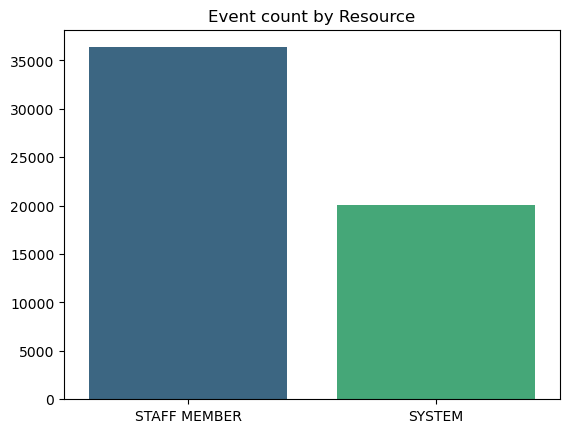

In [81]:
resources = log['org:resource'].unique()
sns.countplot(x='org:resource', data=log, palette='viridis').set(title='Event count by Resource', xlabel='', ylabel='');

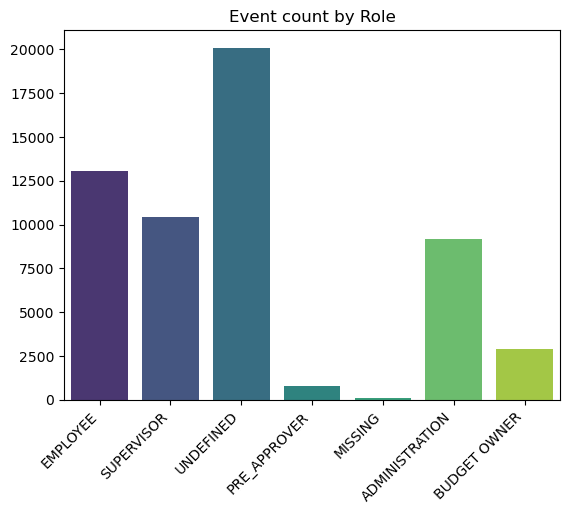

In [82]:
roles = log['org:role'].unique()
sns.countplot(x='org:role', data=log, palette='viridis').set(title='Event count by Role', xlabel='', ylabel='')
plt.xticks(rotation=45, ha='right');

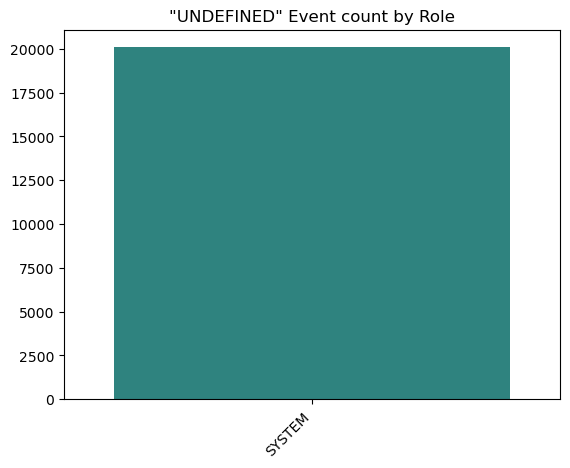

In [83]:
log_i = log[log['org:role'] == 'UNDEFINED']
sns.countplot(x='org:resource', data=log_i, palette='viridis').set(title='"UNDEFINED" Event count by Role', xlabel='', ylabel='')
plt.xticks(rotation=45, ha='right');

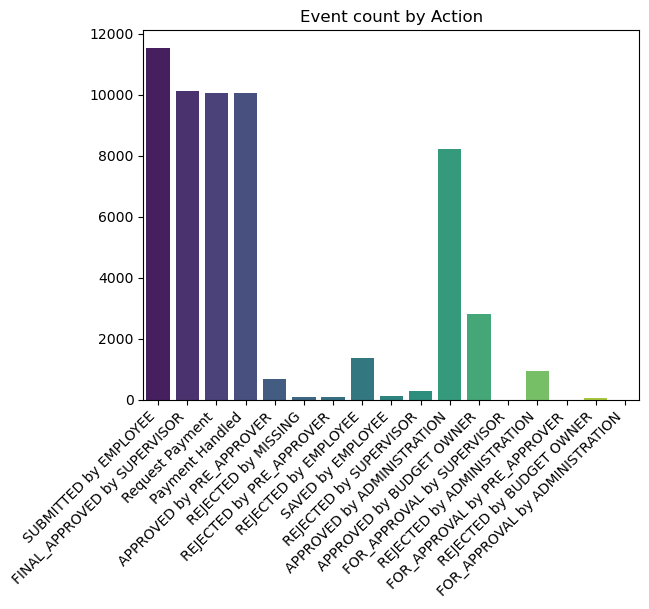

In [84]:
actions = log['concept:name'].unique()
sns.countplot(x='concept:name', data=log, palette='viridis').set(title='Event count by Action', xlabel='', ylabel='')
plt.xticks(rotation=45, ha='right');

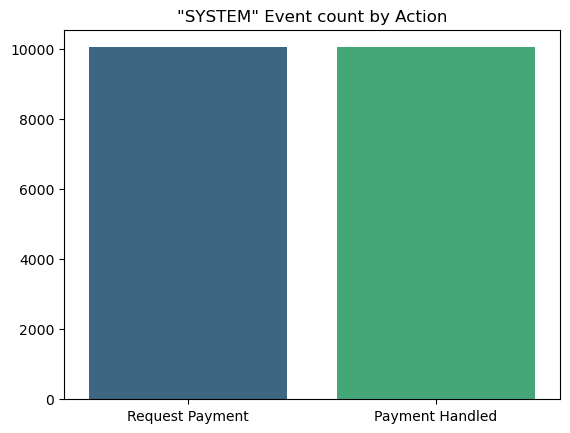

In [85]:
# System Events
log_s = log[log['org:resource'] == 'SYSTEM']
sns.countplot(x='concept:name', data=log_s, palette='viridis').set(title='"SYSTEM" Event count by Action', xlabel='', ylabel='');

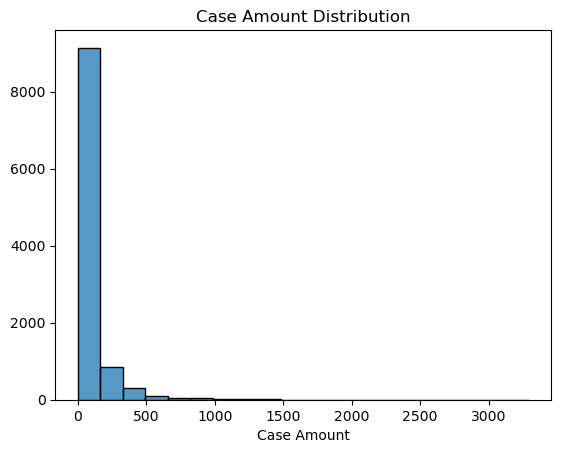

In [86]:
# case amount distribution for distinct case:id
distinct_case_amounts = log.groupby('case:id')['case:Amount'].max()
sns.histplot(distinct_case_amounts, kde=False, bins=20).set(title='Case Amount Distribution', xlabel='Case Amount', ylabel='');

## Process Discovery

Having mined the model we may vizualize it as a Process Tree or Petri Net.

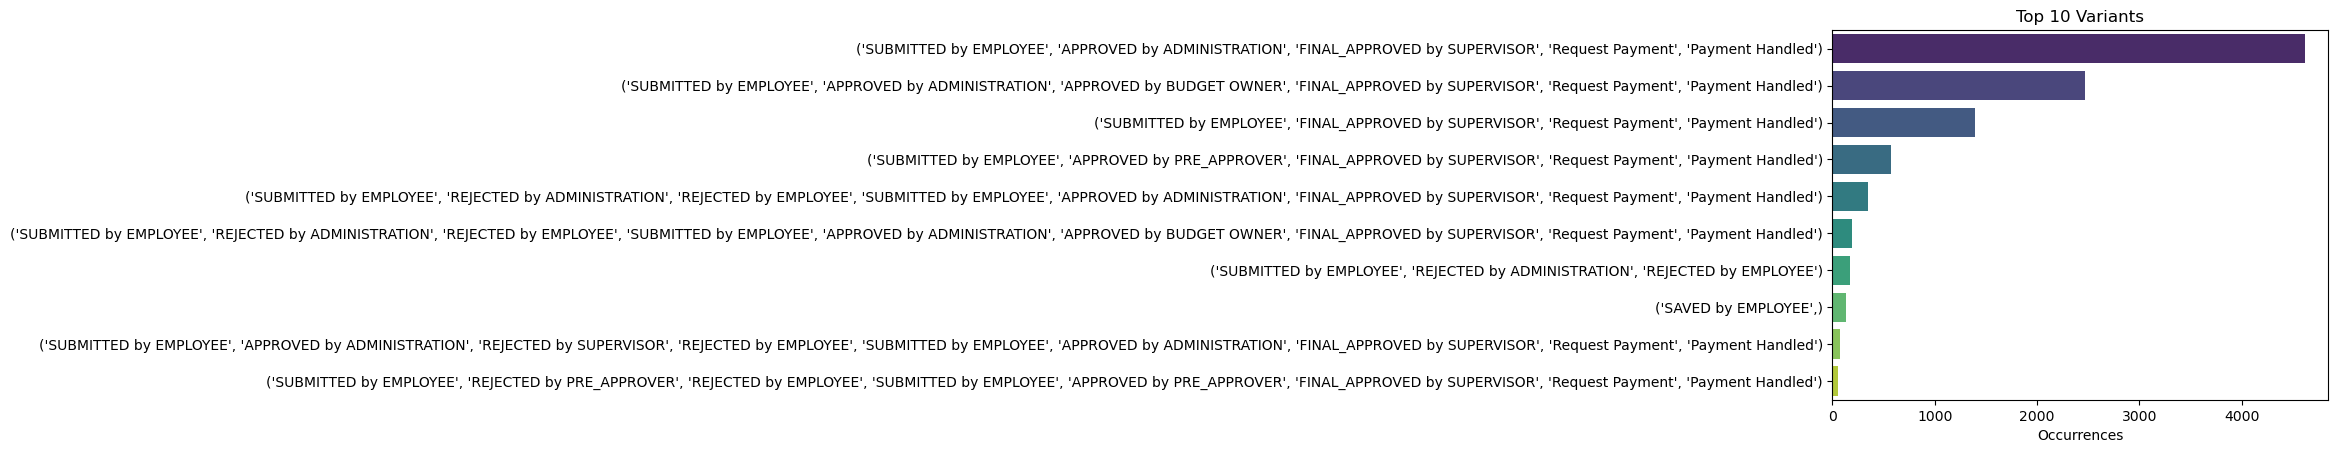

In [87]:
variants_dict = pm4py.get_variants(log)

variants_arr = []
idx = 1
for variant, n in variants_dict.items():
    variant_in_dict = {}
    variant_in_dict['variant_number'] = idx
    variant_in_dict['variant_count'] = n
    variant_in_dict['variant_trace'] = variant
    
    variants_arr.append(variant_in_dict)
    
    idx += 1


variants_df = pd.DataFrame(variants_arr)
variants_df = variants_df.sort_values(by='variant_count', ascending=False)

sns.barplot(x='variant_count', y='variant_trace', data=variants_df[:10], palette='viridis').set(title='Top 10 Variants', xlabel='Occurrences', ylabel='');

In [88]:
cases = log['case:id'].unique()
count_cases_top_10 = variants_df[:10]['variant_count'].sum()
print(f'Top 10 variants account for {count_cases_top_10:,} cases out of {len(cases):,}.')

Top 10 variants account for 10,033 cases out of 10,500.


## Check out BPMN Model

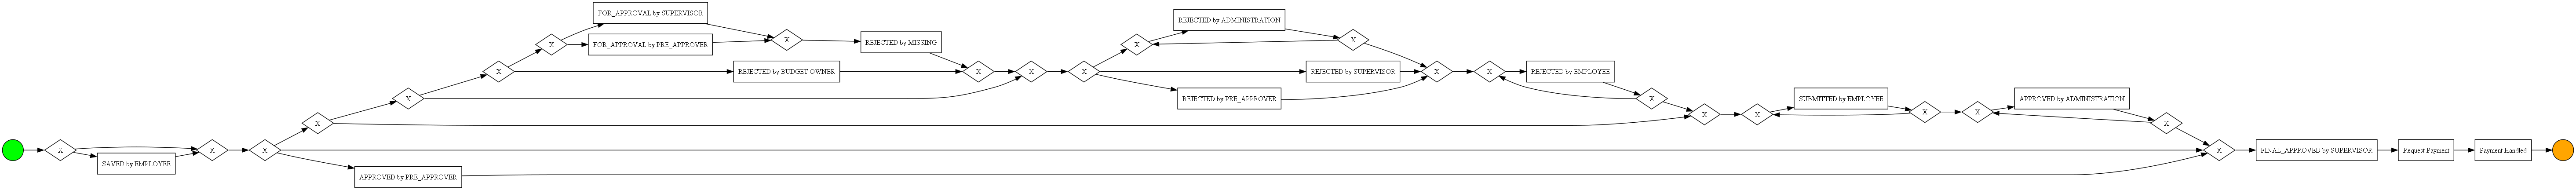

In [89]:
bpmn_model = pm4py.discover_bpmn_inductive(
    log=log,
    noise_threshold=0.8,
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    case_id_key='case:id'
)
pm4py.view_bpmn(bpmn_model)

In BPMN model "x" stands for choice. We may observe that algorithm mined a model with a lot of choices and shortcuts. But on the end of the process it needs to be approved by supervisor. Last two stepps are done by system.

## Process Tree

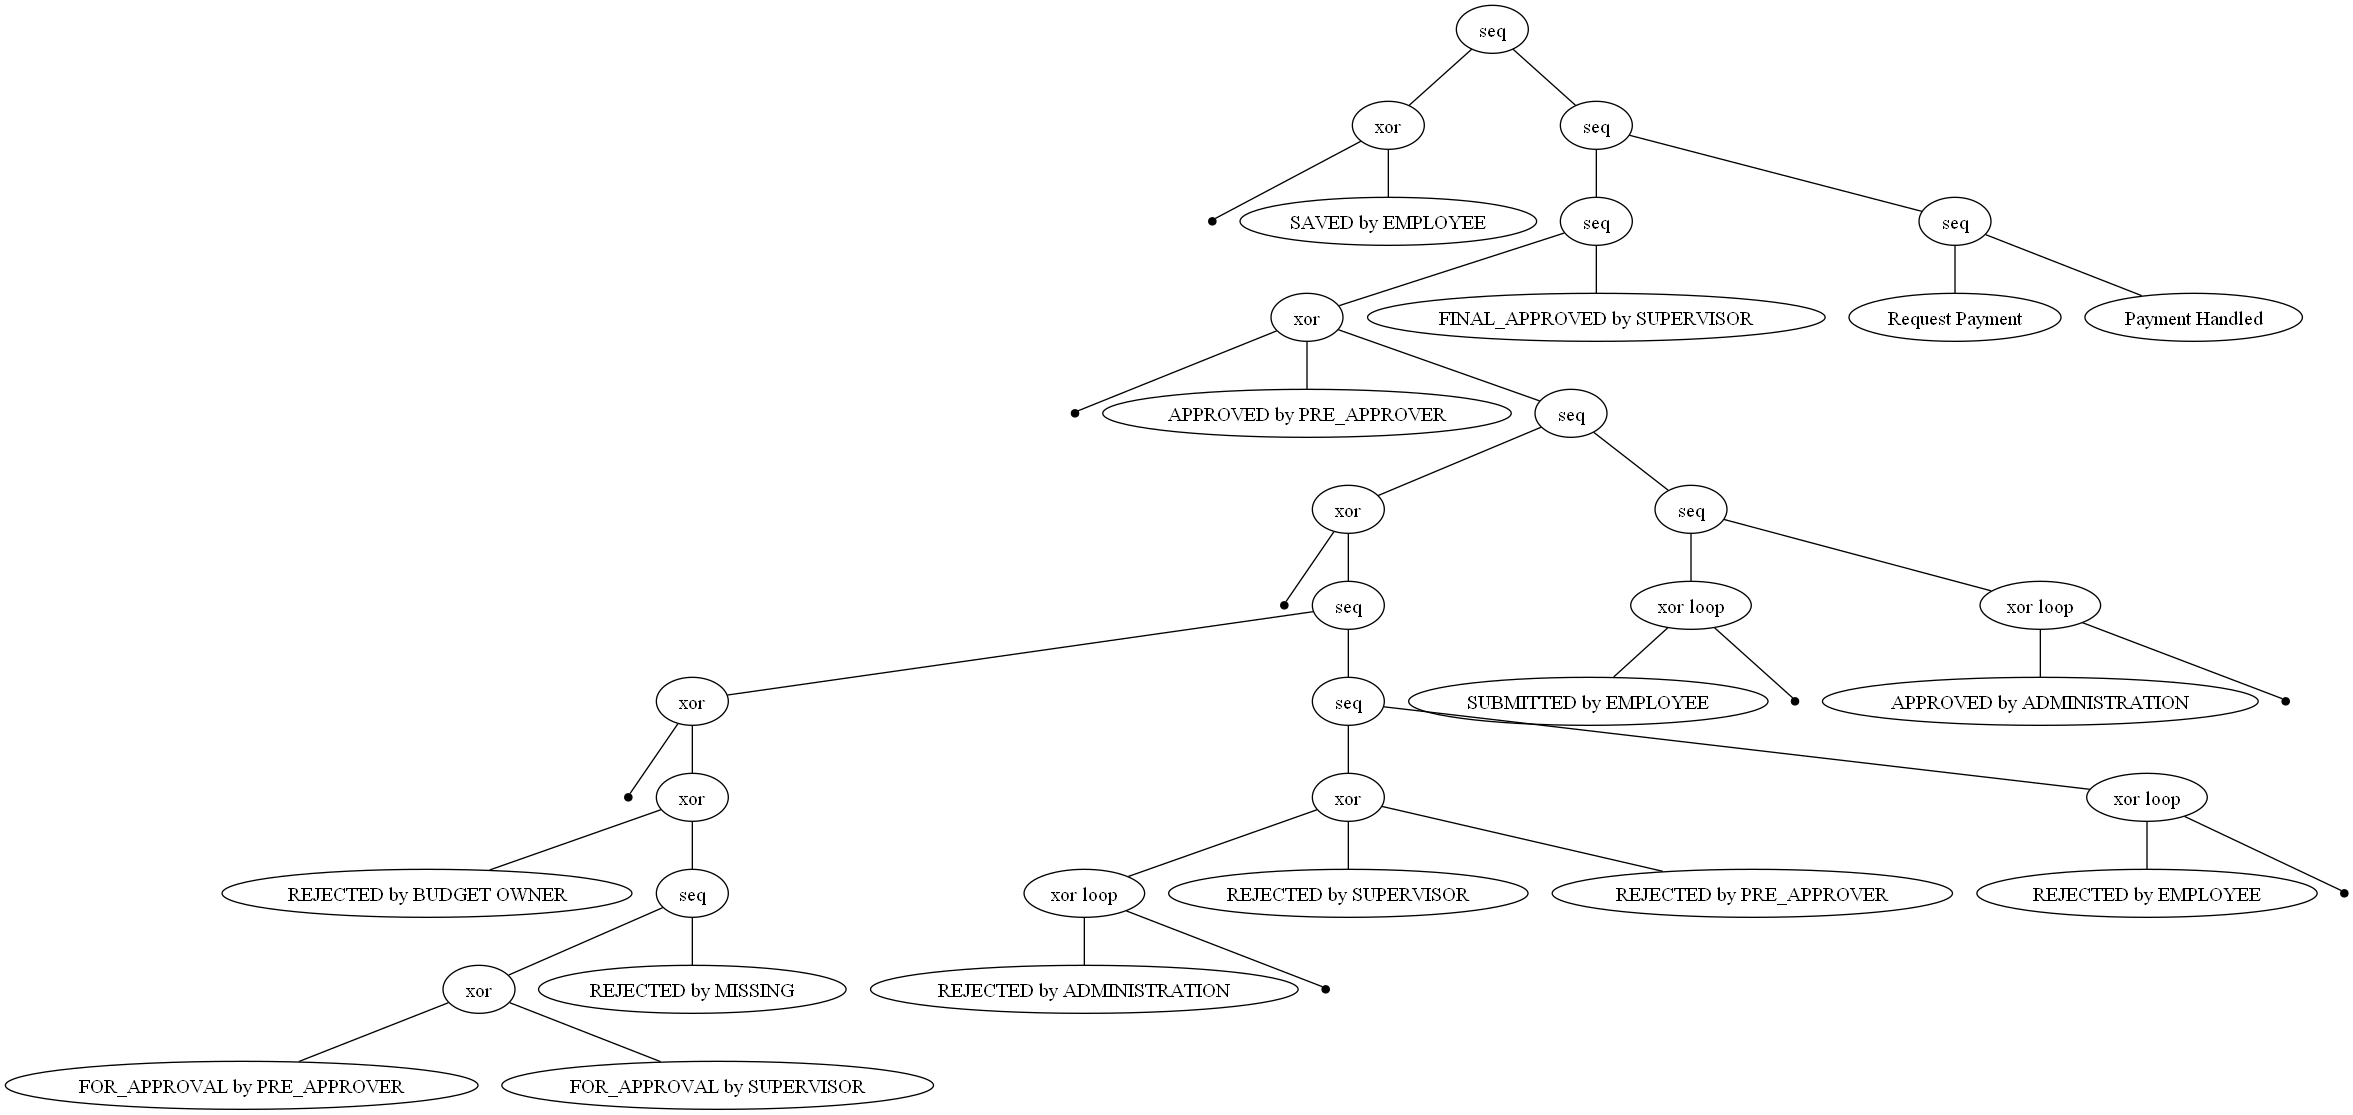

In [90]:
process_tree = pm4py.discover_process_tree_inductive(
    log=log,
    noise_threshold=.8,
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    case_id_key='case:id'
)
pm4py.view_process_tree(process_tree)

## Petri Net

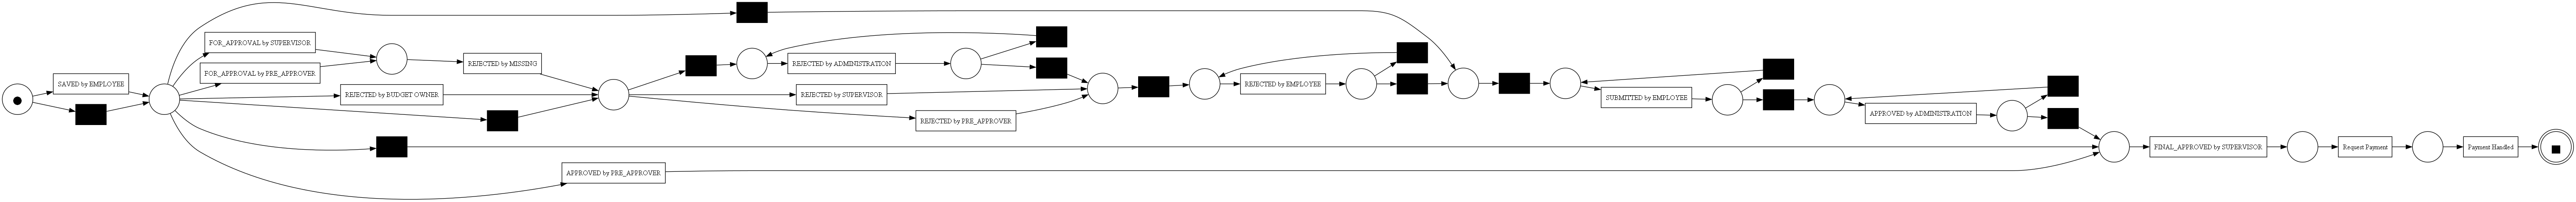

In [91]:
p_net, im, fm = pm4py.discover_petri_net_inductive(
    log=log,
    noise_threshold=.8,
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    case_id_key='case:id'
)
pm4py.view_petri_net(p_net, im, fm)

## Directly-Follows Graph

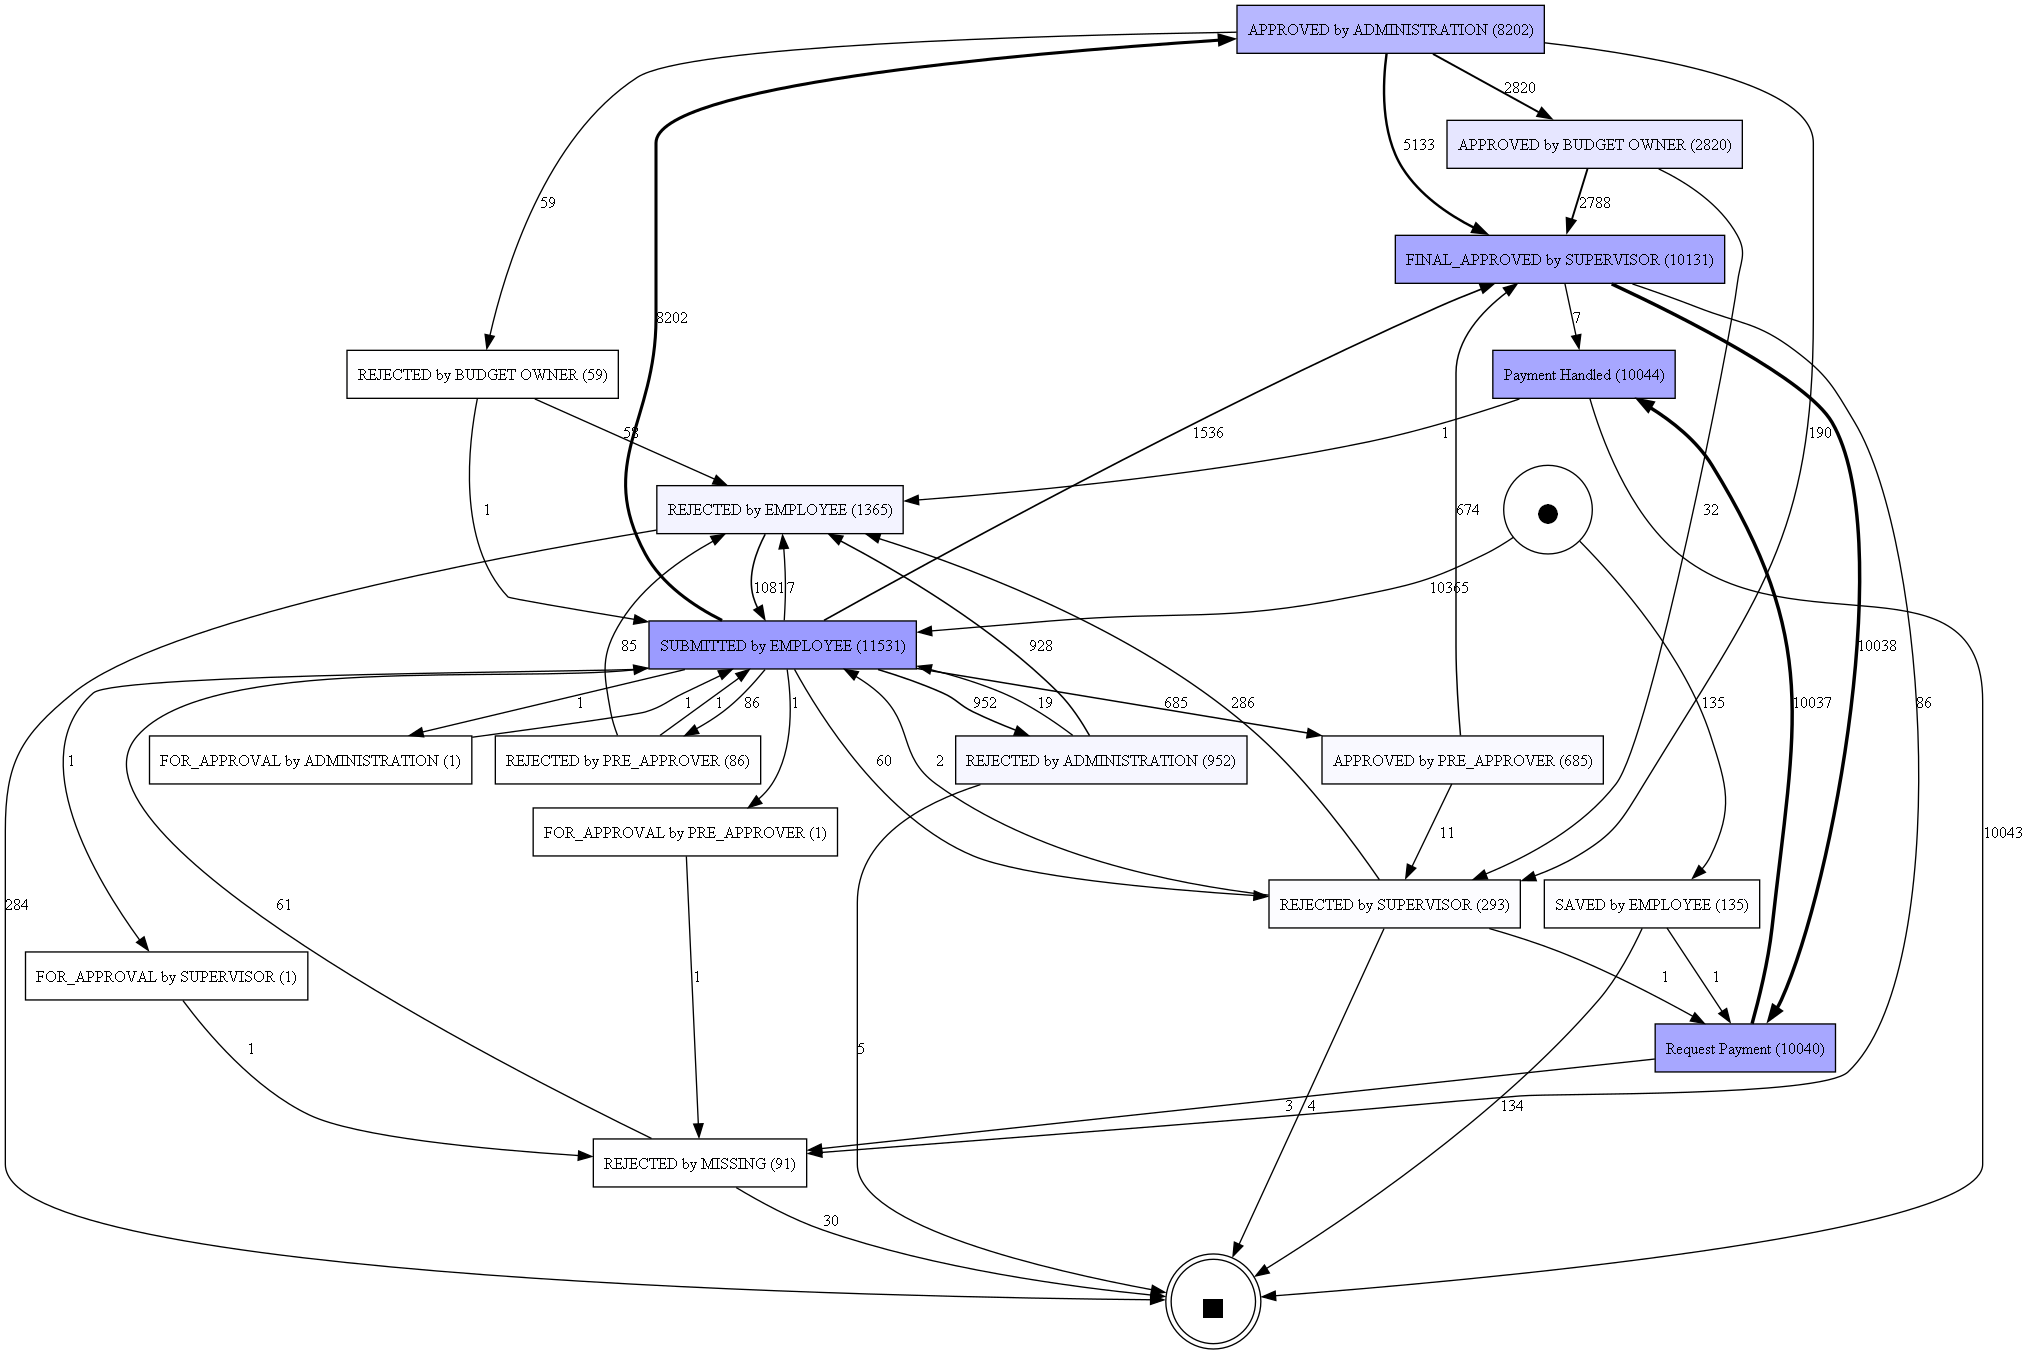

In [92]:
dfg, sa, ea = pm4py.discover_dfg(
    log=log,
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    case_id_key='case:id'
)
pm4py.view_dfg(dfg, sa, ea)

Data Granularity mismatch?

TODO: Try to reshuffle events into new categories and create models again.

## Statistics

TODO

### Process Duration

- How long do the different process instances take? Are there any notable patterns?

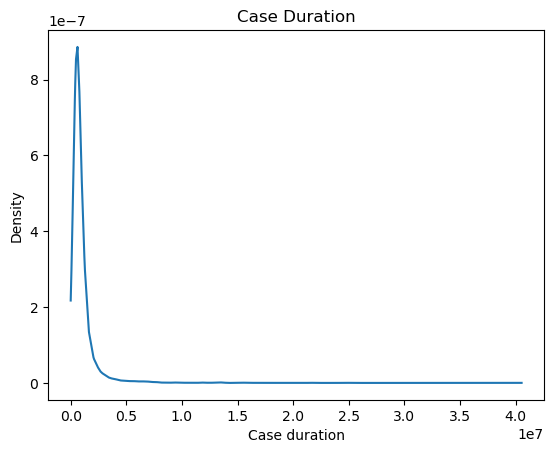

In [93]:
pm4py.view_case_duration_graph(log, format='png', activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
# pm4py.save_vis_case_duration_graph(log, 'duration.png', activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

In [94]:
case_durations = pm4py.get_all_case_durations(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

In [95]:
print(case_durations)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 65.0, 275.0, 314.0, 334.0, 462.00000000000006, 569.0, 861.0, 1409.0, 1488.0, 1661.0, 2025.0000000000002, 2480.0, 3818.0000000000005, 3829.0000000000005, 4359.0, 4590.0, 5130.0, 5288.0, 5698.0, 5805.0, 5900.0, 5916.0, 5939.0, 6036.0, 6060.0, 6125.0, 6139.0, 6208.0, 6303.0, 6469.0, 6953.0, 7046.0, 7549.000000000001, 7601.00000000

In [96]:

durations = {}
for case in log:
    for i in range(len(case) - 1):
        act = case['concept:name'][i]
        duration = (case[i + 1]['time:timestamp'] - case[i]['time:timestamp']).seconds / 3600.0  # in Stunden
        if act in durations:
            durations[act].append(duration)
        else:
            durations[act] = [duration]

avg_durations = {act: sum(durations[act]) / len(durations[act]) for act in durations}


TypeError: string indices must be integers

In [ ]:
duration = pm4py.get_case_duration(log, 'case 1', activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

KeyError: 'case 1'

In [ ]:
cycle_time = pm4py.get_cycle_time(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
print(cycle_time)

0.0


5


- Are there any bottlenecks? If yes, where? If yes, can you think of any reasons?
    -> Prozessdauer vizualisieren auf Petri Net(?)